In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



In [2]:
sns.set_theme() # pour modifier le thème

In [38]:
df = pd.read_csv('D://download//cars.csv',sep=';',decimal=',',encoding='latin-1')

In [11]:
df.head()

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,hc,nox,hcnox,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147.0,...,0.052,0.032,NaN,0.002,1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147.0,...,0.052,0.032,NaN,0.002,1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100.0,...,NaN,0.149,0.175,0.001,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100.0,...,NaN,0.149,0.175,0.001,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125.0,...,NaN,0.164,0.193,0.001,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER


In [5]:
df.corr()

,puiss_admin_98,puiss_max,conso_urb,conso_exurb,conso_mixte,co2,co_typ_1,hc,nox,hcnox,ptcl,masse_ordma_min,masse_ordma_max
puiss_admin_98,1.000000,0.973108,0.666665,0.427705,0.574849,0.463154,0.220700,0.362815,-0.061869,0.167199,0.063770,0.072884,-0.068591
puiss_max,0.973108,1.000000,0.570982,0.315307,0.467978,0.347086,0.256347,0.414212,-0.090229,-0.037007,0.034143,0.008441,-0.145032
conso_urb,0.666665,0.570982,1.000000,0.859567,0.970622,0.909424,-0.055961,0.090057,0.114560,0.563770,0.198630,0.412822,0.242128
conso_exurb,0.427705,0.315307,0.859567,1.000000,0.956032,0.967704,-0.068107,-0.204568,0.230222,0.666573,0.281138,0.630278,0.613887
conso_mixte,0.574849,0.467978,0.970622,0.956032,1.000000,0.971183,-0.063792,-0.040337,0.176504,0.634247,0.254891,0.530382,0.424324
co2,0.463154,0.347086,0.909424,0.967704,0.971183,1.000000,-0.142923,-0.230646,0.242836,0.632166,0.240213,0.643665,0.540156
co_typ_1,0.220700,0.256347,-0.055961,-0.068107,-0.063792,-0.142923,1.000000,0.600279,-0.200100,0.345000,0.068072,-0.286612,-0.026538
hc,0.362815,0.414212,0.090057,-0.204568,-0.040337,-0.230646,0.600279,1.000000,-0.691155,-0.744135,-0.455946,-0.700272,-0.760323
nox,-0.061869,-0.090229,0.114560,0.230222,0.176504,0.242836,-0.200100,-0.691155,1.000000,0.941902,0.715664,0.511100,0.416150
hcnox,0.167199,-0.037007,0.563770,0.666573,0.634247,0.632166,0.345000,-0.744135,0.941902,1.000000,0.231319,0.456441,0.540548


In [12]:
df.dtypes

lib_mrq               object
lib_mod_doss          object
lib_mod               object
dscom                 object
cnit                  object
tvv                   object
cod_cbr               object
hybride               object
puiss_admin_98         int64
puiss_max            float64
typ_boite_nb_rapp     object
conso_urb            float64
conso_exurb          float64
conso_mixte          float64
co2                  float64
co_typ_1             float64
hc                   float64
nox                  float64
hcnox                float64
ptcl                 float64
masse_ordma_min        int64
masse_ordma_max        int64
champ_v9              object
date_maj              object
Carrosserie           object
gamme                 object
dtype: object

In [6]:
cat_vars = df.select_dtypes(include = 'object')
cat_vars['co2']=df.co2
cat_vars.head()


C:\Users\Jian\AppData\Local\Temp/ipykernel_9200/490293788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_vars['co2']=df.co2


,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,typ_boite_nb_rapp,champ_v9,date_maj,Carrosserie,gamme,co2
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,M 6,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,182.0
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,M 6,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,186.0
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,M 6,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,134.0
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,M 6,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,134.0
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,M 6,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,139.0


In [7]:
num_vars = df.select_dtypes(exclude = 'object')
num_vars.head()

,puiss_admin_98,puiss_max,conso_urb,conso_exurb,conso_mixte,co2,co_typ_1,hc,nox,hcnox,ptcl,masse_ordma_min,masse_ordma_max
0,12,147.0,11.3,5.8,7.8,182.0,0.647,0.052,0.032,NaN,0.002,1505,1505
1,12,147.0,11.5,6.0,8.0,186.0,0.647,0.052,0.032,NaN,0.002,1555,1555
2,7,100.0,6.6,4.2,5.1,134.0,0.066,NaN,0.149,0.175,0.001,1565,1565
3,7,100.0,6.6,4.2,5.1,134.0,0.066,NaN,0.149,0.175,0.001,1565,1565
4,9,125.0,6.9,4.3,5.3,139.0,0.060,NaN,0.164,0.193,0.001,1565,1565


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55044 entries, 0 to 55043
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq            55044 non-null  object 
 1   lib_mod_doss       55044 non-null  object 
 2   lib_mod            55044 non-null  object 
 3   dscom              55044 non-null  object 
 4   cnit               55044 non-null  object 
 5   tvv                55044 non-null  object 
 6   cod_cbr            55044 non-null  object 
 7   hybride            55044 non-null  object 
 8   puiss_admin_98     55044 non-null  int64  
 9   puiss_max          55044 non-null  float64
 10  typ_boite_nb_rapp  55044 non-null  object 
 11  conso_urb          55001 non-null  float64
 12  conso_exurb        55001 non-null  float64
 13  conso_mixte        55010 non-null  float64
 14  co2                55010 non-null  float64
 15  co_typ_1           54886 non-null  float64
 16  hc                 977

In [9]:
df.isna().any(axis = 0)

lib_mrq              False
lib_mod_doss         False
lib_mod              False
dscom                False
cnit                 False
tvv                  False
cod_cbr              False
hybride              False
puiss_admin_98       False
puiss_max            False
typ_boite_nb_rapp    False
conso_urb             True
conso_exurb           True
conso_mixte           True
co2                   True
co_typ_1              True
hc                    True
nox                   True
hcnox                 True
ptcl                  True
masse_ordma_min      False
masse_ordma_max      False
champ_v9              True
date_maj              True
Carrosserie          False
gamme                False
dtype: bool

In [10]:
df.shape

(55044, 26)

In [11]:
percent_missing = df.isnull().sum() / len(df)
print(percent_missing)

lib_mrq              0.000000
lib_mod_doss         0.000000
lib_mod              0.000000
dscom                0.000000
cnit                 0.000000
tvv                  0.000000
cod_cbr              0.000000
hybride              0.000000
puiss_admin_98       0.000000
puiss_max            0.000000
typ_boite_nb_rapp    0.000000
conso_urb            0.000781
conso_exurb          0.000781
conso_mixte          0.000618
co2                  0.000618
co_typ_1             0.002870
hc                   0.822451
nox                  0.002870
hcnox                0.179638
ptcl                 0.048652
masse_ordma_min      0.000000
masse_ordma_max      0.000000
champ_v9             0.001108
date_maj             0.941011
Carrosserie          0.000000
gamme                0.000000
dtype: float64


<Figure size 2880x1440 with 0 Axes>

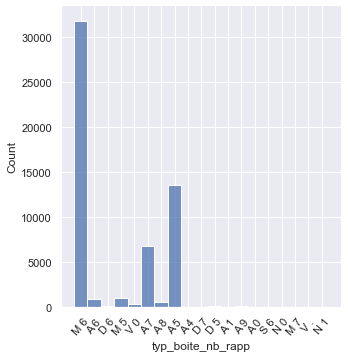

In [50]:
fig = plt.figure(figsize = (40,20))

#plt.subplot(411)
#sns.displot(df.cod_cbr)

#plt.subplot(412)
#sns.displot(df.hybride)

#plt.subplot(223)
#sns.displot(df.puiss_admin_98)

#plt.subplot(234)
#sns.displot(df.puiss_max)

#plt.subplot(414)
sns.displot(df.typ_boite_nb_rapp)
plt.xticks(rotation=50);

#plt.subplot(236)
#sns.displot(df.conso_urb);



In [51]:
#La méthode describe d'un DataFrame retourne un résumé des statistiques descriptives (min, max, moyenne, quantiles,..)
#de ses variables quantitatives.
#C'est donc un outil très utile pour une première visualisation du type et de la distribution ce ces variables.

#Pour analyser les variables catégorielles, il est préférable de commencer par utiliser la méthode value_counts 
#qui renvoie le nombre d'occurrences pour chaque modalité de ces variables. 

df.describe()

,puiss_admin_98,puiss_max,conso_urb,conso_exurb,conso_mixte,co2,co_typ_1,hc,nox,hcnox,ptcl,masse_ordma_min,masse_ordma_max
count,55044.000000,55044.000000,55001.000000,55001.000000,55010.000000,55010.000000,54886.000000,9773.000000,54886.000000,45156.000000,52366.000000,55044.000000,55044.000000
mean,10.551504,118.984916,9.575919,6.730087,7.764832,201.707035,0.181007,0.026552,0.299160,0.233701,0.000892,2102.104553,2341.021801
std,5.126021,45.417430,2.082148,1.038675,1.381668,33.976278,0.145014,0.019279,0.416944,0.037490,0.000990,294.731715,424.067895
min,1.000000,10.000000,0.000000,2.800000,0.600000,13.000000,0.005000,0.000000,0.000000,0.000000,0.000000,825.000000,825.000000
25%,9.000000,100.000000,8.800000,6.500000,7.300000,193.000000,0.061000,0.008000,0.197000,0.216000,0.000000,1982.000000,2075.000000
50%,10.000000,120.000000,9.400000,6.900000,7.800000,205.000000,0.137000,0.030000,0.214000,0.239000,0.001000,2076.000000,2355.000000
75%,10.000000,120.000000,10.200000,7.200000,8.300000,216.000000,0.297000,0.042000,0.228000,0.253000,0.001000,2246.000000,2709.000000
max,81.000000,585.000000,41.099998,14.900000,24.500000,572.000000,0.968000,0.510000,1.846000,0.570000,0.023000,2760.000000,3094.000000


In [16]:
#df['cod_cbr'].value_counts(normalize = True)
#df['hybride'].value_counts(normalize = True)
df['typ_boite_nb_rapp'].value_counts(normalize = True)

M 6    0.577701
A 5    0.246348
A 7    0.123301
M 5    0.018149
A 6    0.015079
A 8    0.009520
V 0    0.006013
D 5    0.001145
A 9    0.000636
D 6    0.000509
D 7    0.000454
A 4    0.000436
M 7    0.000363
A 0    0.000182
A 1    0.000036
N 0    0.000036
V .    0.000036
N 1    0.000036
S 6    0.000018
Name: typ_boite_nb_rapp, dtype: float64

In [6]:
#Relation entre les valeurs
df_corr = df

labelencoder=LabelEncoder()
for column in df_corr.select_dtypes(include = 'object').columns:
    df_corr[column] = labelencoder.fit_transform(df_corr[column])

df_corr.head()



,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,hc,nox,hcnox,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme
0,0,1,8,166,85,32087,3,0,12,147.0,...,0.052,0.032,NaN,0.002,1505,1505,34,3,0,5
1,0,1,8,166,90,32093,3,0,12,147.0,...,0.052,0.032,NaN,0.002,1555,1555,34,3,0,5
2,0,1,8,167,70,32089,11,0,7,100.0,...,NaN,0.149,0.175,0.001,1565,1565,34,3,0,5
3,0,1,8,167,77,32090,11,0,7,100.0,...,NaN,0.149,0.175,0.001,1565,1565,34,3,0,5
4,0,1,8,168,84,32091,11,0,9,125.0,...,NaN,0.164,0.193,0.001,1565,1565,34,3,0,5


<AxesSubplot:>

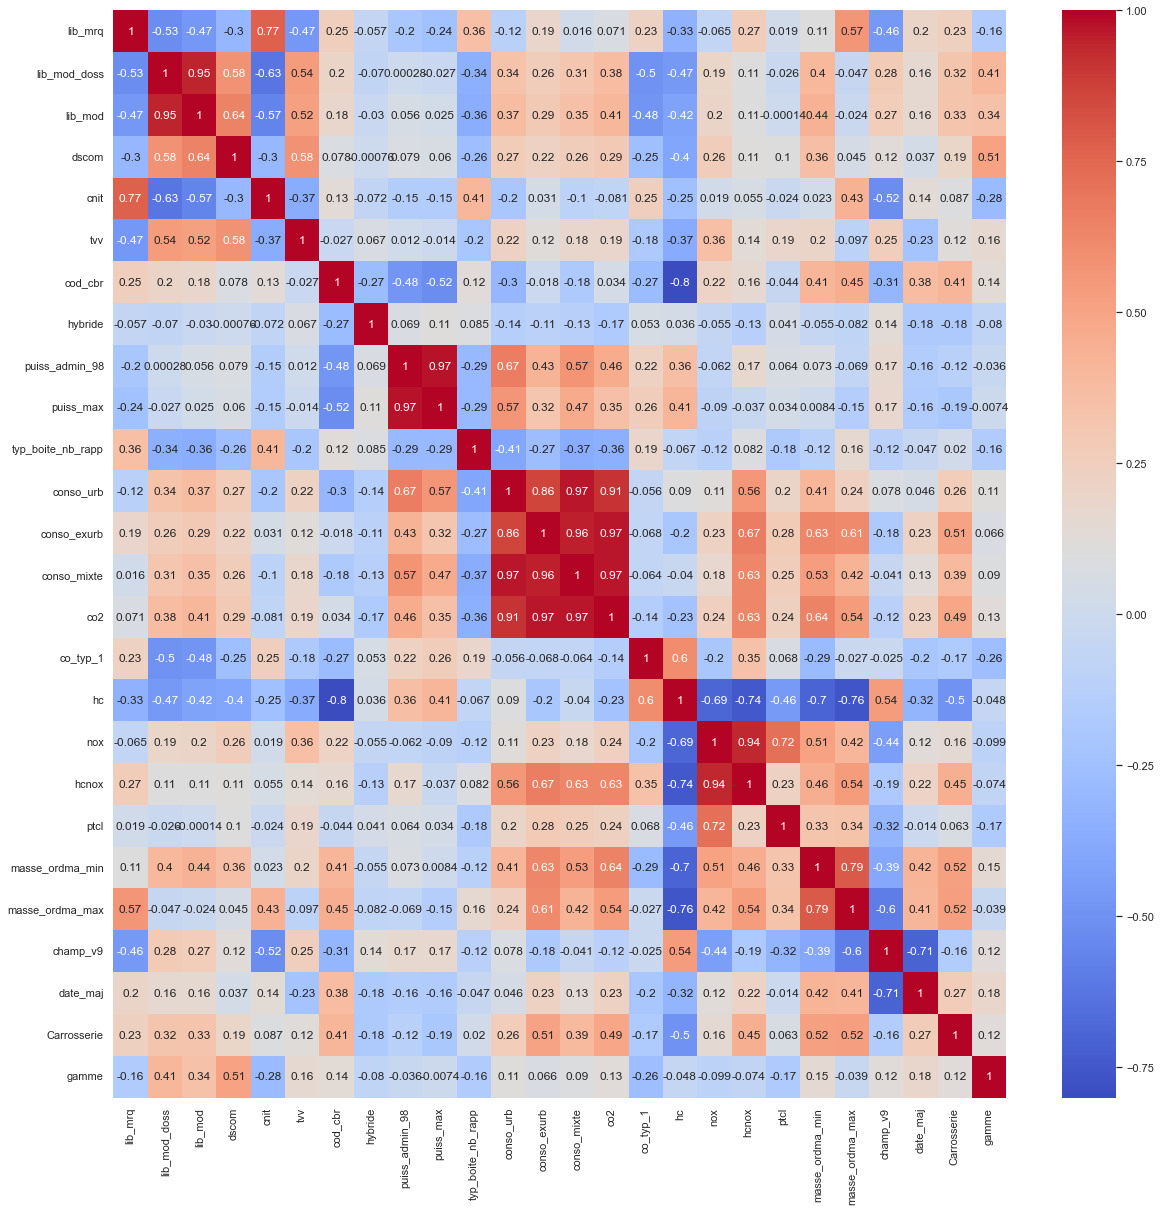

In [7]:
fig, ax = plt.subplots(figsize =(20,20))
sns.heatmap(df_corr.corr(), annot = True, ax = ax, cmap = 'coolwarm')

In [44]:
#les realations entre les variables et co2

#Var cat : result = statsmodels.formula.api.ols('var_num ~ var_cat', data = df).fit()  table = statsmodels.api.stats.anova_lm(result)
import statsmodels.api

#cod_cbr

#result = statsmodels.formula.api.ols('co2 ~cod_cbr', data = df).fit()  
#table = statsmodels.api.stats.anova_lm(result)
#la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle main_category n'influe pas sur pledged.


#hybride
#result = statsmodels.formula.api.ols('co2 ~hybride', data = df_corr).fit()  
#table = statsmodels.api.stats.anova_lm(result)
#la p-value =0

#typ_boite_nb_rapp
#result = statsmodels.formula.api.ols('co2 ~typ_boite_nb_rapp', data = df).fit()  
#table = statsmodels.api.stats.anova_lm(result)
#la p-value =0
#table

#Var qual : pearson  pearsonr(quanti_1,quanti_2).

from scipy.stats import pearsonr

#puiss_admin_98
df['puiss_admin_98'].fillna(df['puiss_admin_98'].median(),inplace=True)
df['conso_urb'].fillna(df['conso_urb'].median(),inplace=True)
df = df.dropna(axis = 0, how = 'all', subset = ['co2'])
df.isna().sum(axis = 0)

#pd.DataFrame(pearsonr(df['puiss_admin_98'], df['co2']), index=['pearson_coeff','p-value'], columns=['resultat_test'])
#pd.DataFrame(pearsonr(df['puiss_max'], df['co2']), index=['pearson_coeff','p-value'], columns=['resultat_test'])
pd.DataFrame(pearsonr(df['conso_urb'], df['co2']), index=['pearson_coeff','p-value'], columns=['resultat_test'])

,resultat_test
pearson_coeff,0.907957
p-value,0.000000
